<a href="https://colab.research.google.com/github/charles01george/01_Humans_or_Not/blob/main/01_Humans_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Humans or not Humans

This project is for differentiate humans and not-humans from a set of different photos which were taken from mainly phones. The data contains some beautiful pictures (taken by myself 😀) of my family members and friends.

## Get the data

In [21]:
import os
import tensorflow as tf

In [22]:
data = "/content/drive/MyDrive/01_Humans_or_Not"

In [23]:
os.listdir(data)

['Test', 'Train']

In [24]:
os.listdir(os.path.join(data, "Train"))

['humans', 'not_humans']

### Inspect the data

In [25]:
os.listdir(os.path.join(data, "Train", "humans"))[:5]

['0B699446-ECAE-4A34-96E6-51DE3ECDA3EC Small.jpeg',
 '0A40694B-BB3D-4D5C-8BC6-9B0DBD90C58C Small.jpeg',
 '0A8F2502-6427-4730-9960-4BC7EB3B1D90 Small.jpeg',
 '0a754ad1-4640-4de5-8bbd-5f81dbbf904a Small.jpeg',
 '1D50442A-0CC3-41D0-9B97-388A14E81374 Small.jpeg']

In [26]:
os.listdir(os.path.join(data, "Train", "not_humans"))[:5]

['3CC26C46-9F19-425A-B386-56B742745A66 Small.jpeg',
 '1C247B1C-254C-4BE7-BB6F-843A2C39DB7C Small.jpeg',
 '3C72CC29-04D9-4E9D-87C7-4F873E8CE0A6 Small.jpeg',
 '3D0529AD-D8A9-496B-836B-94B52BD89E85 Small.jpeg',
 '0A97A324-04BD-4368-8F97-F1679CDD425E Small.jpeg']

In [27]:
len(os.listdir("drive/MyDrive/01_Humans_or_Not/Train/humans"))

507

In [28]:
# How many images are in our dataset
data = tf.keras.utils.image_dataset_from_directory("drive/MyDrive/01_Humans_or_Not")

Found 1090 files belonging to 2 classes.


In [29]:
# Number of training images
tf.keras.utils.image_dataset_from_directory("drive/MyDrive/01_Humans_or_Not/Train/")

Found 1018 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
# How many human images in our training set
num_human_images_train = len(os.listdir("drive/MyDrive/01_Humans_or_Not/Train/humans"))
num_human_images_train

507

In [31]:
# How many not-human images in our training set
num_not_human_images_train = len(os.listdir("drive/MyDrive/01_Humans_or_Not/Train/not_humans"))
num_not_human_images_train

511

In [32]:
data = "/content/drive/MyDrive/01_Humans_or_Not/Train"
data

'/content/drive/MyDrive/01_Humans_or_Not/Train'

In [33]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape

  return img

Image shape: (320, 180, 3)


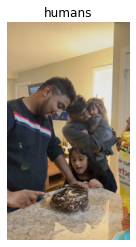

In [34]:
img = view_random_image(target_dir="drive/MyDrive/01_Humans_or_Not/Train/",
                  target_class="humans")

In [35]:
# View the image (array/tensor)
img

array([[[186, 158, 119],
        [185, 157, 118],
        [184, 156, 117],
        ...,
        [125, 109,  83],
        [125, 109,  83],
        [125, 109,  83]],

       [[185, 157, 118],
        [184, 156, 117],
        [183, 155, 115],
        ...,
        [126, 110,  84],
        [126, 110,  84],
        [125, 109,  83]],

       [[184, 156, 116],
        [183, 155, 115],
        [183, 155, 115],
        ...,
        [128, 112,  86],
        [127, 111,  85],
        [127, 111,  85]],

       ...,

       [[181, 156, 134],
        [185, 163, 140],
        [185, 163, 140],
        ...,
        [ 66, 174, 202],
        [ 65, 173, 201],
        [ 64, 172, 201]],

       [[187, 162, 140],
        [188, 163, 141],
        [189, 167, 144],
        ...,
        [ 63, 177, 204],
        [ 62, 176, 203],
        [ 61, 175, 202]],

       [[188, 163, 141],
        [190, 165, 143],
        [185, 163, 140],
        ...,
        [ 63, 178, 205],
        [ 62, 177, 204],
        [ 61, 176, 203]]

In [36]:
# Image shape
img.shape 

(320, 180, 3)

The values in the `img` array are between 0 and 255, however neural networks prefer the values between 0 and 1. One of the most common preprocessign steps for working with images is to `Scale` (normalize) their pixel values by dividing the image arrays by 255

In [37]:
# Get all the pixel values between 0 & 1
img/255.0

array([[[0.72941176, 0.61960784, 0.46666667],
        [0.7254902 , 0.61568627, 0.4627451 ],
        [0.72156863, 0.61176471, 0.45882353],
        ...,
        [0.49019608, 0.42745098, 0.3254902 ],
        [0.49019608, 0.42745098, 0.3254902 ],
        [0.49019608, 0.42745098, 0.3254902 ]],

       [[0.7254902 , 0.61568627, 0.4627451 ],
        [0.72156863, 0.61176471, 0.45882353],
        [0.71764706, 0.60784314, 0.45098039],
        ...,
        [0.49411765, 0.43137255, 0.32941176],
        [0.49411765, 0.43137255, 0.32941176],
        [0.49019608, 0.42745098, 0.3254902 ]],

       [[0.72156863, 0.61176471, 0.45490196],
        [0.71764706, 0.60784314, 0.45098039],
        [0.71764706, 0.60784314, 0.45098039],
        ...,
        [0.50196078, 0.43921569, 0.3372549 ],
        [0.49803922, 0.43529412, 0.33333333],
        [0.49803922, 0.43529412, 0.33333333]],

       ...,

       [[0.70980392, 0.61176471, 0.5254902 ],
        [0.7254902 , 0.63921569, 0.54901961],
        [0.7254902 , 0

## End-to-end example

Replicating a model from CNN explainer webpage https://poloclub.github.io/cnn-explainer/

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(33)

# Preprocess data (get all of the training values between 0 and 1, also called scaling/ normalization)
train_datagen = ImageDataGenerator(rescale=1./255.0)
valid_datagen = ImageDataGenerator(rescale=1./255.0)

# Setup the train and test directories
train_dir = "drive/MyDrive/01_Humans_or_Not/Train/"
test_dir = "drive/MyDrive/01_Humans_or_Not/Test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=33)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=33)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)), # first layer specifies input shape(height, width, colour channel)
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=2,
                                 padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1018 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Epoch 1/5
32/32 [==============================] - 9s 150ms/step - loss: 0.6525 - accuracy: 0.5963 - val_loss: 0.6642 - val_accuracy: 0.5417
Epoch 2/5
32/32 [==============================] - 5s 143ms/step - loss: 0.5603 - accuracy: 0.7240 - val_loss: 0.6951 - val_accuracy: 0.6250
Epoch 3/5
32/32 [==============================] - 5s 163ms/step - loss: 0.4976 - accuracy: 0.7515 - val_loss: 0.6299 - val_accuracy: 0.7083
Epoch 4/5
32/32 [==============================] - 4s 136ms/step - loss: 0.3774 - accuracy: 0.8360 - val_loss: 0.6897 - val_accuracy: 0.6528
Epoch 5/5
32/32 [==============================] - 4s 135ms/step - loss: 0.2719 - accuracy: 0.8851 - val_loss: 0.9475 - val_accuracy: 0.6111


In [39]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  